# Data Preprocessing: Titanic-Spaceship <span style="color:orange">**Competition**</span>
<img src="../assets/spaceship-pic.jpg" alt="Title-Pic">

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame
from numpy.random import choice
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.preprocessing import StandardScaler


np.set_printoptions(suppress=True)
sns.set(rc={"figure.figsize": (10, 6), "axes.titlesize": 20, "axes.titleweight": "bold", "axes.labelsize": 15})

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data

In [3]:
df_train = pd.read_csv("../data/data.csv")
df_test = pd.read_csv("../data/test.csv")
df_train.shape, df_test.shape

((8693, 14), (4277, 13))

In [4]:
# (its a competition)
df = pd.concat([df_train, df_test])
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


# Helper Functions & Constants

In [5]:
# Columns
PID = "PassengerId"
HOME_PLANET = "HomePlanet"
CRYO_SLEEP = "CryoSleep"
CABIN = "Cabin"
DESTINATION = "Destination"
AGE = "Age"
VIP = "VIP"
ROOM_SERVICE = "RoomService"
FOOD_COURT = "FoodCourt"
SHOPPING_MALL = "ShoppingMall"
SPA = "Spa"
VR_DECK = "VRDeck"
NAME = "Name"
TRANSPORTED = "Transported"

# Constants
TARGET = "Target"
PAYMENTS = "Payments"

TRUE_FALSE_MAP = {False: 0, True: 1}

In [6]:
def plot_target_relation(column_name):
    #_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    #ax1, ax2 = axes
    
    target_pvt = df.pivot_table(index=column_name, values=TARGET, aggfunc="mean").sort_index()

    #sns.pointplot(x=TRANSPORTED, y=column_name, data=df, ax=ax1, order=["Poor", "Standard", "Good"]).set_title(f"Relation Credit-Score and {column_name}")
    sns.regplot(x=target_pvt.index, y=target_pvt.to_numpy(), ci=False, line_kws={"color": "C1"}, scatter_kws={"alpha": 0.5}).set_title(f"Linear Relation Transported and {column_name}")

In [7]:
def plot_target_relation_cat(column_name):
    g = sns.pointplot(x=column_name, y=TARGET, data=df)
    g.set_title(f"Relation Transported and {column_name}")
    g.tick_params(axis='x', rotation=45)

In [8]:
def plot_dist(column_name):
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    ax1, ax2 = axes
    
    title = f"Distribution of {column_name}"
    ax1.set_title(title)
    ax2.set_title(title)

    sns.boxplot(x=column_name, data=df, ax=ax1)
    df[column_name].hist(ax=ax2)

    print(f"Skew: \t {df[column_name].skew()}")

In [9]:
def plot_dist_cat(column_name):
    g = sns.countplot(x=column_name, data=df, color="C0")
    g.tick_params(axis='x', rotation=45)
    g.set_title(f"Distribution of {column_name}")

# Data Preprocessing

## First Overview

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [11]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
df.describe(include=["O"])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,12970,12682,12660,12671,12696,12674,12676,8693
unique,12970,3,2,9825,3,2,12629,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Carry Contrevins,True
freq,1,6865,8079,8,8871,12401,2,4378


## Drop Features

In [13]:
df.drop(columns=[NAME], inplace=True)
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True


## Target | Transported

In [14]:
df.rename(columns={TRANSPORTED: TARGET}, inplace=True)
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Target
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True


In [15]:
df[TARGET].value_counts(dropna=False)

True     4378
False    4315
NaN      4277
Name: Target, dtype: int64

In [16]:
df.loc[~df[TARGET].isna(), TARGET] = df.loc[~df[TARGET].isna(), TARGET].map(TRUE_FALSE_MAP).astype("int")
df[TARGET].value_counts(dropna=False)

1.0    4378
0.0    4315
NaN    4277
Name: Target, dtype: int64

## General Preprocessing

In [17]:
df[CRYO_SLEEP] = df[CRYO_SLEEP].map(TRUE_FALSE_MAP)
df[VIP] = df[VIP].map(TRUE_FALSE_MAP)

display(
    df[CRYO_SLEEP].value_counts(dropna=False),
    df[VIP].value_counts(dropna=False)
)

0.0    8079
1.0    4581
NaN     310
Name: CryoSleep, dtype: int64

0.0    12401
NaN      296
1.0      273
Name: VIP, dtype: int64

In [18]:
df[CABIN] = df[CABIN].str[0]
df[CABIN].value_counts(dropna=False)

F      4239
G      3781
E      1323
B      1141
C      1102
D       720
A       354
NaN     299
T        11
Name: Cabin, dtype: int64

In [19]:
def set_payments_to_zero(column_name):
    df.loc[df[column_name].isna(), column_name] = 0
    
set_payments_to_zero(ROOM_SERVICE)
set_payments_to_zero(FOOD_COURT)
set_payments_to_zero(SHOPPING_MALL)
set_payments_to_zero(SPA)
set_payments_to_zero(VR_DECK)

df.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Target          4277
dtype: int64

## HomePlanet

In [20]:
df[HOME_PLANET].isna().sum()

288

In [21]:
display(
    df.loc[df[HOME_PLANET] == "Earth", [FOOD_COURT, SPA, VR_DECK]].quantile(q=[0.8]),
    df.loc[df[HOME_PLANET] == "Mars", [FOOD_COURT, SPA, VR_DECK]].quantile(q=[0.8]),
    df.loc[df[HOME_PLANET] == "Europa", [FOOD_COURT, SPA, VR_DECK]].quantile(q=[0.8])
)

,FoodCourt,Spa,VRDeck
0.8,104.2,95.2,91.0


,FoodCourt,Spa,VRDeck
0.8,0.0,14.4,0.0


,FoodCourt,Spa,VRDeck
0.8,2506.0,1016.4,1103.4


In [22]:
europa_condition1 = (
    (df[HOME_PLANET].isna()) & 
    (
        (df[FOOD_COURT] > 105) | 
        (df[SPA] > 105) | 
        (df[VR_DECK] > 105)
    )
)
df.loc[europa_condition1, HOME_PLANET] = "Europa" 
df[df[HOME_PLANET].isna()].shape

(165, 13)

In [23]:
display(
    df.loc[df[HOME_PLANET] == "Earth", [SHOPPING_MALL, ROOM_SERVICE]].quantile(q=[0.8]),
    df.loc[df[HOME_PLANET] == "Mars", [SHOPPING_MALL, ROOM_SERVICE]].quantile(q=[0.8]),
    df.loc[df[HOME_PLANET] == "Europa", [SHOPPING_MALL, ROOM_SERVICE]].quantile(q=[0.8])
)

,ShoppingMall,RoomService
0.8,85.0,95.2


,ShoppingMall,RoomService
0.8,529.2,1044.4


,ShoppingMall,RoomService
0.8,0.0,0.0


In [24]:
mars_condition1 = (
    (df[HOME_PLANET].isna()) & 
    (
        (df[SHOPPING_MALL] > 100) | 
        (df[ROOM_SERVICE] > 105)
    )
)
df.loc[mars_condition1, HOME_PLANET] = "Mars" 
df[df[HOME_PLANET].isna()].shape

(119, 13)

In [25]:
df.loc[(df[HOME_PLANET].isna()) & (df[TARGET] == 1), HOME_PLANET] = "Europa"
df[df[HOME_PLANET].isna()].shape

(48, 13)

In [26]:
df[df[HOME_PLANET].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Target
1550,1645_01,NaN,1.0,NaN,55 Cancri e,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1757,1865_06,NaN,0.0,G,TRAPPIST-1e,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1807,1926_01,NaN,1.0,G,TRAPPIST-1e,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2166,2312_01,NaN,1.0,G,TRAPPIST-1e,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2173,2319_01,NaN,1.0,G,PSO J318.5-22,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2281,2451_01,NaN,1.0,G,PSO J318.5-22,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2290,2461_01,NaN,1.0,G,TRAPPIST-1e,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2642,2822_05,NaN,1.0,G,TRAPPIST-1e,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3370,3624_01,NaN,0.0,G,TRAPPIST-1e,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3816,4078_01,NaN,1.0,G,TRAPPIST-1e,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [27]:
df.loc[(df[HOME_PLANET].isna()) & (df[CABIN].isin(["G", "F"])), HOME_PLANET] = "Earth"
df[df[HOME_PLANET].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Target
1550,1645_01,NaN,1.0,NaN,55 Cancri e,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
535,1124_02,NaN,1.0,C,TRAPPIST-1e,22.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1063,2245_01,NaN,1.0,A,55 Cancri e,43.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1335,2855_01,NaN,1.0,D,55 Cancri e,50.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1545,3341_01,NaN,1.0,C,55 Cancri e,19.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1569,3368_05,NaN,1.0,E,TRAPPIST-1e,47.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2141,4639_05,NaN,1.0,C,TRAPPIST-1e,33.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2822,6240_01,NaN,1.0,E,TRAPPIST-1e,49.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3093,6781_01,NaN,1.0,A,55 Cancri e,59.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3220,7065_01,NaN,1.0,E,TRAPPIST-1e,28.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [28]:
df.loc[(df[HOME_PLANET].isna()) & (df[CABIN].isin(["C", "A"])), HOME_PLANET] = "Europa"
df.loc[(df[HOME_PLANET].isna()) & (df[CABIN].isin(["D"])), HOME_PLANET] = "Mars"
df[df[HOME_PLANET].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Target
1550,1645_01,NaN,1.0,NaN,55 Cancri e,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1569,3368_05,NaN,1.0,E,TRAPPIST-1e,47.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2822,6240_01,NaN,1.0,E,TRAPPIST-1e,49.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3220,7065_01,NaN,1.0,E,TRAPPIST-1e,28.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [29]:
df.loc[(df[HOME_PLANET].isna()) & (df[AGE] > 40), HOME_PLANET] = "Europa"
df.loc[(df[HOME_PLANET].isna()), HOME_PLANET] = "Earth"
df.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Target          4277
dtype: int64

## CryoSleep

In [30]:
df[CRYO_SLEEP].isna().sum()

310

In [31]:
pay_cols = [ROOM_SERVICE, FOOD_COURT, SHOPPING_MALL, SPA, VR_DECK]
df.loc[df[CRYO_SLEEP] == 1, pay_cols].quantile(q=[0.99])

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0.99,0.0,0.0,0.0,0.0,0.0


In [32]:
cryo_true_condition1 = (
    (df[CRYO_SLEEP].isna()) & 
    (
        (df[ROOM_SERVICE] < 1) &
        (df[FOOD_COURT] < 1) &
        (df[SHOPPING_MALL] < 1) &
        (df[SPA] < 1) &
        (df[VR_DECK] < 1)
    )
)

df.loc[cryo_true_condition1, CRYO_SLEEP] = 1
df[df[CRYO_SLEEP].isna()].shape

(174, 13)

In [33]:
df.loc[df[CRYO_SLEEP].isna(), CRYO_SLEEP] = 0
df[CRYO_SLEEP] = df[CRYO_SLEEP].astype("int")
df.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            299
Destination      274
Age              270
VIP              296
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Target          4277
dtype: int64

# Cabin

In [34]:
df[CABIN].isna().sum()

299

In [35]:
def get_cabin(home_planet):
    match home_planet:
        case "Earth":
            rand_num = choice([0, 1, 2], p=[0.6, 0.3, 0.1])
            return "G" if rand_num == 0 else "F" if rand_num == 1 else "E"
        case "Europa":
            rand_num = choice([0, 1, 2, 3], p=[0.4, 0.4, 0.1, 0.1])
            return "B" if rand_num == 0 else "C" if rand_num == 1 else "A" if rand_num == 2 else "D"
        case _:
            rand_num = choice([0, 1, 2], p=[0.8, 0.11, 0.09])
            return "F" if rand_num == 0 else "E" if rand_num == 1 else "D"

In [36]:
is_cabin_na = (df[CABIN].isna())
df.loc[is_cabin_na, CABIN] = df.loc[is_cabin_na, HOME_PLANET].apply(get_cabin)
df[df[CABIN].isna()].shape

(0, 13)

In [37]:
df[CABIN].value_counts()

F    4322
G    3876
E    1355
B    1177
C    1141
D     731
A     357
T      11
Name: Cabin, dtype: int64

## Destination

In [38]:
df[DESTINATION].isna().sum()

274

In [39]:
df[DESTINATION].fillna(df[DESTINATION].mode()[0], inplace=True)

In [40]:
df.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age              270
VIP              296
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Target          4277
dtype: int64

## Age

In [41]:
df[AGE].isna().sum()

270

In [42]:
# hier eigenes Model bauen!

age_by_home_planet_map = df.pivot_table(index=HOME_PLANET, values=AGE, aggfunc="median").to_dict()[AGE]
is_age_na = (df[AGE].isna())

df.loc[is_age_na, AGE] = df.loc[is_age_na, HOME_PLANET].map(age_by_home_planet_map)
df[AGE].isna().sum()

0

In [43]:
df[AGE] = pd.cut(df[AGE], bins=6, labels=False)
df[AGE].value_counts()

1    5046
2    3791
3    1854
0    1376
4     776
5     127
Name: Age, dtype: int64

In [44]:
df.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP              296
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Target          4277
dtype: int64

## VIP

In [45]:
df[VIP].isna().sum()

296

In [46]:
payments_sum = df[[ROOM_SERVICE, FOOD_COURT, SHOPPING_MALL, SPA, VR_DECK]].sum(axis=1)
payments_sum

0           0.0
1         736.0
2       10383.0
3        5176.0
4        1091.0
         ...   
4272        0.0
4273     1018.0
4274        0.0
4275     3203.0
4276        0.0
Length: 12970, dtype: float64

In [47]:
df.loc[(df[VIP].isna()) & (df[HOME_PLANET] == "Earth"), VIP] = 0

In [48]:
df.loc[(df[VIP].isna()) & (payments_sum > 1500), VIP] = 1

In [49]:
df[VIP] = df[VIP].fillna(0).astype("int")
df.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Target          4277
dtype: int64

# Final Preprocessing

In [50]:
df[TARGET] = df[TARGET].astype("float")
df[TARGET].dtype

dtype('float64')

## Drop columns

In [51]:
df.drop(columns=[DESTINATION, CABIN, VIP, AGE], inplace=True)
df

,PassengerId,HomePlanet,CryoSleep,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Target
0,0001_01,Europa,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0002_01,Earth,0,109.0,9.0,25.0,549.0,44.0,1.0
2,0003_01,Europa,0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,0003_02,Europa,0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,0004_01,Earth,0,303.0,70.0,151.0,565.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,0.0,0.0,0.0,0.0,0.0,NaN
4273,9269_01,Earth,0,0.0,847.0,17.0,10.0,144.0,NaN
4274,9271_01,Mars,1,0.0,0.0,0.0,0.0,0.0,NaN
4275,9273_01,Europa,0,0.0,2680.0,0.0,0.0,523.0,NaN


## Encoding

In [52]:
dummy_df = pd.get_dummies(df.iloc[:, 1:])
df = pd.concat([df.iloc[:, 0], dummy_df], axis=1)
df.head(2).T

,0,1
PassengerId,0001_01,0002_01
CryoSleep,0,0
RoomService,0.0,109.0
FoodCourt,0.0,9.0
ShoppingMall,0.0,25.0
Spa,0.0,549.0
VRDeck,0.0,44.0
Target,0.0,1.0
HomePlanet_Earth,0,1
HomePlanet_Europa,1,0


## Log-Transformation

In [53]:
log_cols = [ROOM_SERVICE, FOOD_COURT, SHOPPING_MALL, SPA, VR_DECK]
df[log_cols] = np.log10(df[log_cols] + 1)
df[log_cols].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,0.756988,0.825786,0.698337,0.795915,0.754999
std,1.182153,1.272636,1.117581,1.200098,1.189375
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.640957,1.804470,1.380211,1.707570,1.568202
max,4.156186,4.474420,4.370938,4.350422,4.382629


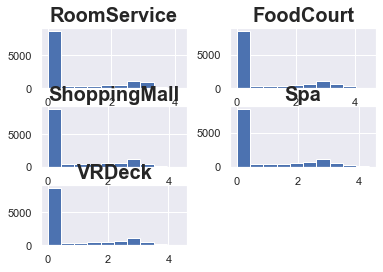

In [54]:
df[log_cols].hist();

## Scaling

In [55]:
scale_cols = log_cols

In [56]:
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])
df[scale_cols].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04
mean,-1.657203e-16,-1.224413e-16,-4.492252e-17,1.533940e-17,3.396581e-17
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-6.403721e-01,-6.489033e-01,-6.248885e-01,-6.632339e-01,-6.348103e-01
25%,-6.403721e-01,-6.489033e-01,-6.248885e-01,-6.632339e-01,-6.348103e-01
50%,-6.403721e-01,-6.489033e-01,-6.248885e-01,-6.632339e-01,-6.348103e-01
75%,7.477902e-01,7.690510e-01,6.101576e-01,7.596804e-01,6.837491e-01
max,2.875540e+00,2.867100e+00,3.286332e+00,2.961963e+00,3.050148e+00


## Split Train-Test-Data

In [57]:
df_train = df[~df[TARGET].isna()].drop(columns=[PID])
df_test = df[df[TARGET].isna()].drop(columns=[TARGET])

display(
    (df_train.shape, df_test.shape),
    df_train.head(2),
    df_test.head(2)
)

((8693, 10), (4277, 10))

,CryoSleep,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Target,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0,-0.640372,-0.648903,-0.624889,-0.663234,-0.634810,0.0,0,1,0
1,0,1.086538,0.136898,0.641264,1.620304,0.755227,1.0,1,0,0


,PassengerId,CryoSleep,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0013_01,1,-0.640372,-0.648903,-0.624889,-0.663234,-0.63481,1,0,0
1,0018_01,0,-0.640372,0.136898,-0.624889,2.212364,-0.63481,1,0,0


## Over Sampling the data

In [58]:
df_train[TARGET].value_counts()

1.0    4378
0.0    4315
Name: Target, dtype: int64

In [59]:
df_ex_target = df_train.drop(columns=[TARGET])
train_df_names = df_ex_target.columns

In [60]:
inputs = df_ex_target.to_numpy()
targets = df_train[TARGET].to_numpy()

inputs.shape, targets.shape

((8693, 9), (8693,))

In [61]:
bsmote = BorderlineSMOTE(random_state=101)
inputs, targets = bsmote.fit_resample(inputs, targets)

inputs.shape, targets.shape

((8756, 9), (8756,))

In [62]:
tmp_df = DataFrame(data=np.hstack([inputs, targets.reshape(-1, 1)]), columns=np.hstack([train_df_names, TARGET]))
tmp_df.head()

,CryoSleep,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Target
0,0.0,-0.640372,-0.648903,-0.624889,-0.663234,-0.634810,0.0,1.0,0.0,0.0
1,0.0,1.086538,0.136898,0.641264,1.620304,0.755227,1.0,0.0,0.0,1.0
2,0.0,0.749902,2.143455,-0.624889,2.525889,0.793700,0.0,1.0,0.0,0.0
3,0.0,-0.640372,1.793810,1.675295,2.272011,1.288796,0.0,1.0,0.0,0.0
4,0.0,1.460007,0.805817,1.327477,1.630682,-0.233642,1.0,0.0,0.0,1.0


In [63]:
tmp_df[TARGET].value_counts()

0.0    4378
1.0    4378
Name: Target, dtype: int64

# Data Export

In [64]:
df_test.to_csv("../model_data/submission_test_data3.csv", index=False)

In [65]:
np.savez("../model_data/titanic_spaceship_prep_data3", inputs=inputs, targets=targets, input_column_names=train_df_names)

In [66]:
test_load = np.load("../model_data/titanic_spaceship_prep_data3.npz", allow_pickle=True)
test_load["inputs"].shape, test_load["targets"].shape, test_load["input_column_names"]

((8756, 9),
 (8756,),
 array(['CryoSleep', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
        'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa',
        'HomePlanet_Mars'], dtype=object))

In [67]:
####################################
#   PLAN
#   1)
#       Age -> Binning
#       Payments zusammenfassen


#   2)
#       Cabin & Destination raus


####################################